# Problem Statement: 
* A financial institution wants to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:
* Loanee Information (Demographic data like age, Identity proof etc.)
* Loan Information (Disbursal details, loan to value ratio etc.)
* Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)
* Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimizing the default rates.



### Import required libraries

In [166]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from warnings import filterwarnings
filterwarnings('ignore')

In [167]:
# to show the all the columns
pd.options.display.max_columns = None

# display all rows of the dataframe
#pd.options.display.max_rows = None

plt.rcParams['figure.figsize'] = [10,5]

### Read csv file

In [168]:
df = pd.read_csv('train.csv')

In [169]:
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [170]:
df.shape

# We have total 233154 rows and 41 columns

(233154, 41)

In [171]:
# Data types of variable
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [172]:
# For easy access of columns name we are replacing '.' to '_'
col = []
for i in df.columns:
    a = i.replace('.','_')
    col.append(a)
df.columns = col

In [173]:
# Changing Incorrect Data Types
df['UniqueID'] = df.UniqueID.astype('object')
df['branch_id'] = df.branch_id.astype('object')
df['supplier_id'] = df.supplier_id.astype('object')
df['manufacturer_id'] = df.manufacturer_id.astype('object')
df['Current_pincode_ID'] = df.Current_pincode_ID.astype('object')
df['Employee_code_ID'] = df.Employee_code_ID.astype('object')
df['State_ID'] = df.State_ID.astype('object')
df['Date_of_Birth'] = df.Date_of_Birth.astype('datetime64', '%d-%m-%y')
df['DisbursalDate'] = df['DisbursalDate'].astype('datetime64', '%d-%m-%y')
df['MobileNo_Avl_Flag'] = df.MobileNo_Avl_Flag.astype('object')
df['Aadhar_flag'] = df.Aadhar_flag.astype('object')
df['PAN_flag']= df.PAN_flag.astype('object')
df['VoterID_flag']= df.VoterID_flag.astype('object')
df['Passport_flag']=df.Passport_flag.astype('object')
df['Driving_flag'] = df.Driving_flag.astype('object')
df['loan_default'] = df.loan_default.astype('object')

In [174]:
# Five point Summary For Numerical variables
df.describe()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615
std,12971.314171,1.894478e+04,11.456636,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498
min,13320.000000,3.700000e+04,10.030000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000


In [175]:
# Five point Summary For Categorical variables
df.describe(include = 'object')

,UniqueID,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,loan_default
count,233154,233154,233154,233154,233154,225493,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154
unique,233154,82,2953,11,6698,2,22,3270,1,2,2,2,2,2,20,192,294,2
top,420825,2,18317,86,2578,Self employed,4,2546,1,1,0,0,0,0,No Bureau History Available,0yrs 0mon,0yrs 0mon,0
freq,1,13138,1432,109534,1880,127635,44870,628,233154,195924,215533,199360,227735,232658,116950,119373,119127,182543


In [176]:
# There some which have more number of unique values we can not move ahead with them
# As even they are not showing any kind of pattern
df.drop(['UniqueID','branch_id', 'supplier_id', 'Current_pincode_ID','State_ID','Employee_code_ID'], axis = 1, inplace=True)

In [177]:
# ALl customer provided mobile no so it does not gives any different information to data
del df['MobileNo_Avl_Flag']

In [178]:
obs = pd.crosstab(df['loan_default'],df['manufacturer_id']).values
print('Pvalue: ', sts.chi2_contingency(obs)[1])
print('Pvalue less than 0.05: ', sts.chi2_contingency(obs)[1] < 0.05)

Pvalue:  1.5277380091688753e-93
Pvalue less than 0.05:  True


# DATA PREPROCESSING
## Missing Values

In [179]:
# Missing value in percentage per column
df.isnull().sum()[df.isnull().sum()> 0]/len(df)*100

Employment_Type    3.285811
dtype: float64

In [180]:
# Lets see how is data distributed
df.Employment_Type.value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [181]:
df.Employment_Type.replace(np.NaN, 'UnEmployeed', inplace=True)

In [182]:
df['Employment_Type'].value_counts()

Self employed    127635
Salaried          97858
UnEmployeed        7661
Name: Employment_Type, dtype: int64

In [183]:
# Lets Perform chi2_contingency to check wheather is there any impact on target variable
table = pd.crosstab(df['Employment_Type'], df['loan_default']).values
print('P value', sts.chi2_contingency(table)[1])
print('Pvalue less than 0.05: ', sts.chi2_contingency(table)[1] < 0.05)

P value 3.1225422343284505e-42
Pvalue less than 0.05:  True


## Data Cleaning

In [184]:
df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [185]:
df['CREDIT_HISTORY_LENGTH'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: CREDIT_HISTORY_LENGTH, dtype: object

In [186]:
# lets make function to change it
def months(x):
    result = int(x.split(' ')[0][:-3])*12 + int(x.split(' ')[1][:-3])
    return result

In [187]:
# Applying on the columns and assigning same name as they had
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(months)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(months)

In [188]:
# lets check the change
df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0


## Feature Selection

In [195]:
# Lets check numerical variable with t unpaired test
nume = df.select_dtypes(np.number).columns
pvalue = []
df1 = df[df['loan_default'] == 0]
df2 = df[df['loan_default'] == 1]

for i in nume:
    t_stat, p_value = sts.ttest_ind(df1[i], df2[i])
    pvalue.append(p_value)
    print('p value of is {} is {}'.format(i,p_value))

p value of is disbursed_amount is 8.74561717585509e-309
p value of is asset_cost is 5.716223071536896e-12
p value of is ltv is 0.0
p value of is PERFORM_CNS_SCORE is 1.869421119257312e-172
p value of is PRI_NO_OF_ACCTS is 9.576575137572993e-66
p value of is PRI_ACTIVE_ACCTS is 3.448627479875517e-89
p value of is PRI_OVERDUE_ACCTS is 9.138488408377107e-87
p value of is PRI_CURRENT_BALANCE is 6.221337646272035e-40
p value of is PRI_SANCTIONED_AMOUNT is 4.798158421546997e-08
p value of is PRI_DISBURSED_AMOUNT is 7.176942237800462e-08
p value of is SEC_NO_OF_ACCTS is 5.1490255376949666e-05
p value of is SEC_ACTIVE_ACCTS is 0.003805646152419518
p value of is SEC_OVERDUE_ACCTS is 0.5081054926877384
p value of is SEC_CURRENT_BALANCE is 0.0075643427363124875
p value of is SEC_SANCTIONED_AMOUNT is 0.002153062273491789
p value of is SEC_DISBURSED_AMOUNT is 0.0025523226185338705
p value of is PRIMARY_INSTAL_AMT is 2.958254960232989e-07
p value of is SEC_INSTAL_AMT is 0.4546434321302706
p value of

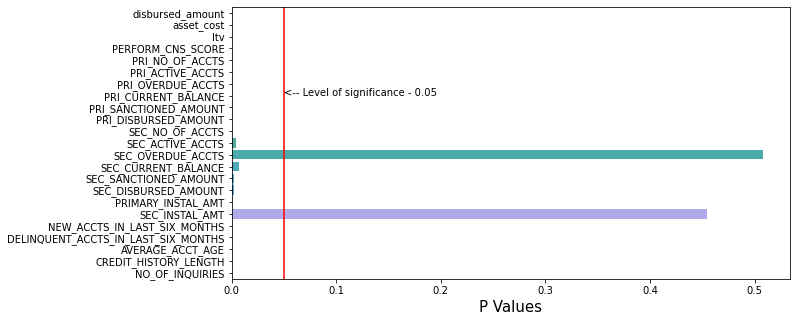

In [190]:
# Lets plot p value of numerical columns
sns.barplot(y = nume, x = pvalue)
plt.axvline(0.05, c = 'r')
plt.xlabel('P Values', fontsize = 15)
plt.text(x = 0.05,y = 7, s='<-- Level of significance - 0.05' )
plt.show()

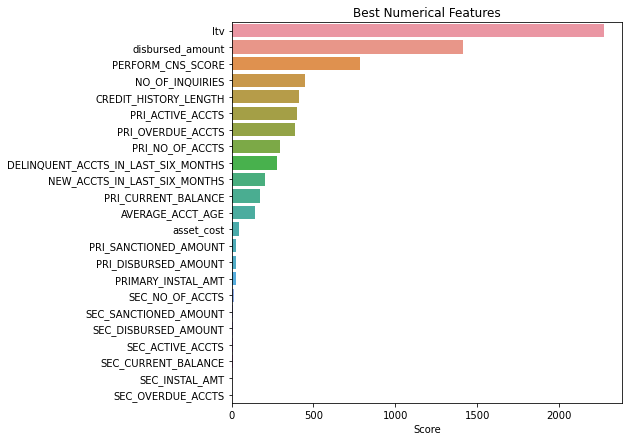

In [191]:
from sklearn.feature_selection import SelectKBest, f_classif

# Lets fit the SelectKbest with f_Annava has its function
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(df[nume],df['loan_default'])

# Saving in dataframe
kbest = pd.DataFrame(numcols.scores_, columns=['Score'], index= nume)

# Sorting in descending order
kbest = kbest.sort_values('Score', ascending = False)

#lets plot
plt.figure(figsize=(7,7))
sns.barplot(x=kbest['Score'], y = kbest.index)
plt.title('Best Numerical Features')
plt.show()

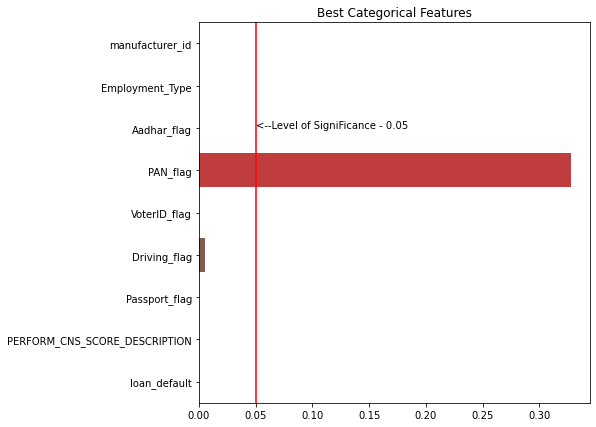

In [192]:
#Chi Square test for Categorical Columns
l=[]

cate = df.select_dtypes('object').columns
for i in cate:
    pvalue  = sts.chi2_contingency(pd.crosstab(df['loan_default'],df[i]))[1]
    l.append(pvalue)

# Lets Plot p value of categoricaL columns
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=cate)
plt.title('Best Categorical Features')
plt.axvline(x = (0.05), color='r')
plt.text(x = 0.05, y = 2, s = '<--Level of SigniFicance - 0.05')
plt.show()

In [193]:
cat=df.select_dtypes('object')
from scipy.stats import chi2_contingency
for i in cat.columns:
    print('p value of is {} is {}'.format(i,chi2_contingency(pd.crosstab(df['loan_default'],df[i]))[1]))

p value of is manufacturer_id is 1.5277380091688753e-93
p value of is Employment_Type is 3.1225422343284505e-42
p value of is Aadhar_flag is 1.1791998402218374e-89
p value of is PAN_flag is 0.3277743362589148
p value of is VoterID_flag is 5.603683381655361e-99
p value of is Driving_flag is 0.0052012912081583085
p value of is Passport_flag is 0.0002987981770071958
p value of is PERFORM_CNS_SCORE_DESCRIPTION is 0.0
p value of is loan_default is 0.0


## Feature Extraction

In [29]:
# Combing both primary accounts and secondary accounts info 
df['Total_NO_OF_ACCTS']  = df['PRI_NO_OF_ACCTS'] + df['SEC_NO_OF_ACCTS']
df['Total_ACTIVE_ACCTS'] = df['PRI_ACTIVE_ACCTS'] + df['SEC_ACTIVE_ACCTS']
df['Total_OVERDUE_ACCTS'] = df['PRI_OVERDUE_ACCTS'] + df['SEC_OVERDUE_ACCTS']
df['Total_CURRENT_BALANCE'] = df['PRI_CURRENT_BALANCE'] + df['SEC_CURRENT_BALANCE']
df['Total_SANCTIONED_AMOUNT'] = df['PRI_SANCTIONED_AMOUNT'] + df['SEC_SANCTIONED_AMOUNT']
df['Total_DISBURSED_AMOUNT'] = df['PRI_DISBURSED_AMOUNT'] + df['SEC_DISBURSED_AMOUNT']
df['Total_INSTAL_AMT'] = df['PRIMARY_INSTAL_AMT'] + df['SEC_INSTAL_AMT']

In [30]:
# Lets drop rest of them
df.drop(['PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS','SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT'], axis = 1, inplace=True)

In [31]:
df['No_of_documents'] = df['Aadhar_flag'] + df['PAN_flag'] + df['VoterID_flag'] + df['Driving_flag'] + df['Passport_flag']

In [32]:
# lets drop all of them
df.drop(['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'], axis = 1, inplace=True)

In [33]:
# We can get age of customer by date of birth and disbursal date
# Wrong tranformation of date... lets make it correct
dob = []
for i in df['Date_of_Birth']:
    if i.year > 2018:
        j = i.replace(year=i.year-100)
        dob.append(j)
    else:
        dob.append(i)
df['Date_of_Birth'] = dob

In [34]:
df['Age'] = df['DisbursalDate'].dt.year - df['Date_of_Birth'].dt.year 
df['Age'].head()

0    34
1    33
2    33
3    25
4    41
Name: Age, dtype: int64

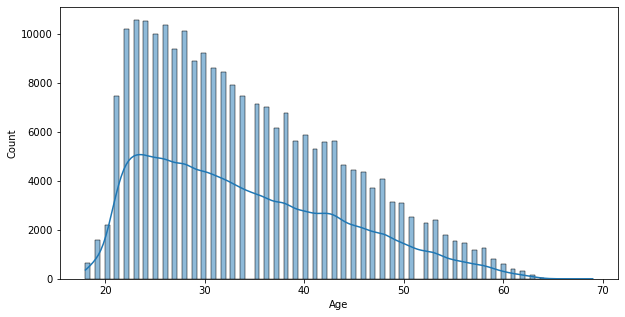

In [35]:
sns.histplot(df['Age'],kde = True )
plt.show()

In [36]:
df1 = df[df['loan_default'] == 0]
df2 = df[df['loan_default'] == 1]

t_stat, p_value = sts.ttest_ind(df1['Age'], df2['Age'])
print('P value', p_value)
print('Pvalue less than 0.05: ', p_value < 0.05)

P value 1.6119724395993934e-72
Pvalue less than 0.05:  True


In [37]:
# Lets drop both date columns 
df.drop(['Date_of_Birth','DisbursalDate'], axis = 1, inplace=True)

## Feature Engineering

In [38]:
df.groupby('PERFORM_CNS_SCORE_DESCRIPTION')['PERFORM_CNS_SCORE'].max()

PERFORM_CNS_SCORE_DESCRIPTION
A-Very Low Risk                                            890
B-Very Low Risk                                            805
C-Very Low Risk                                            760
D-Very Low Risk                                            735
E-Low Risk                                                 705
F-Low Risk                                                 680
G-Low Risk                                                 650
H-Medium Risk                                              630
I-Medium Risk                                              600
J-High Risk                                                570
K-High Risk                                                520
L-Very High Risk                                           350
M-Very High Risk                                           300
No Bureau History Available                                  0
Not Scored: More than 50 active Accounts found              11
Not Scored: No Activity s

In [39]:
# Lets bin CNS_SCORE_DESCRIPTION 
Low = ['A-Very Low Risk','B-Very Low Risk','C-Very Low Risk','D-Very Low Risk','E-Low Risk','F-Low Risk','G-Low Risk']
High = ['J-High Risk','K-High Risk','L-Very High Risk','M-Very High Risk']
Medium = ['H-Medium Risk','I-Medium Risk']

# defining Function
def des_cate(x):
    if x in Low:
        return 3
    elif x in Medium:
        return 2
    elif x in High:
        return 1
    else:
        return 0
    
# lets make cate
df['CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(des_cate)

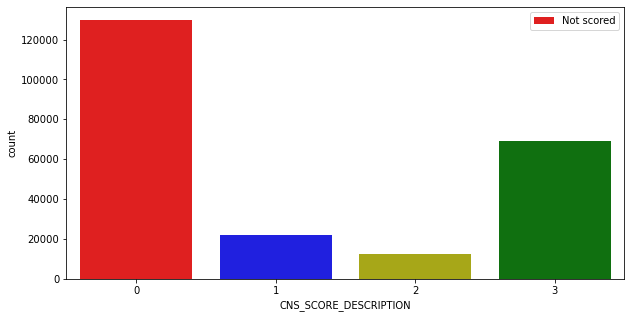

In [40]:
sns.countplot(df['CNS_SCORE_DESCRIPTION'], palette = ['r', 'b', 'y', 'g'])
plt.legend(labels = ['Not scored', 'High Risk', 'Medium Risk', 'Low Risk'])
plt.show()

In [41]:
# Lets Perform chi2_contingency to check wheather is there any impact on target variable
table = pd.crosstab(df['CNS_SCORE_DESCRIPTION'], df['loan_default']).values
print('P value', sts.chi2_contingency(table)[1])
print('Pvalue less than 0.05: ', sts.chi2_contingency(table)[1] < 0.05)

P value 0.0
Pvalue less than 0.05:  True


In [42]:
# lets drop PERFORM_CNS_SCORE_DESCRIPTION becouse we have new column now
del df['PERFORM_CNS_SCORE_DESCRIPTION']

## Feature Analysis

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   manufacturer_id                      233154 non-null  object 
 4   Employment_Type                      233154 non-null  object 
 5   PERFORM_CNS_SCORE                    233154 non-null  int64  
 6   NEW_ACCTS_IN_LAST_SIX_MONTHS         233154 non-null  int64  
 7   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  233154 non-null  int64  
 8   AVERAGE_ACCT_AGE                     233154 non-null  int64  
 9   CREDIT_HISTORY_LENGTH                233154 non-null  int64  
 10  NO_OF_INQUIRIES                      233154 non-null  int64  
 11  loan_default 

### Dependent/Target variable

In [44]:
df.loan_default.value_counts(normalize=True)*100

0    78.292888
1    21.707112
Name: loan_default, dtype: float64

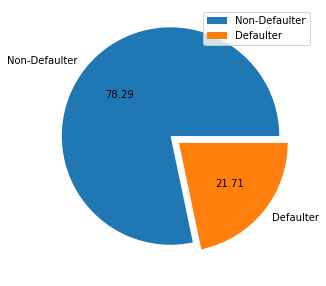

In [45]:
plt.pie(df.loan_default.value_counts(normalize=True)*100, labels=['Non-Defaulter','Defaulter'], explode=[0.1,0],autopct='%.2f')
plt.legend()
plt.show()

- The data for target variable is highly imbalanced we need to balance if required.

### Independent variables

In [46]:
# firstly separate the numerical and categorical variable

cate = ['manufacturer_id', 'Employment_Type','No_of_documents','CNS_SCORE_DESCRIPTION']

nume = [i for i in df.columns if i not in cate and i != 'loan_default']

len(cate), len(nume)

(4, 17)

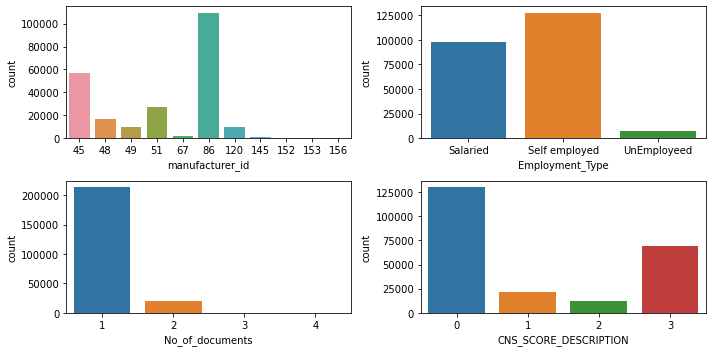

In [47]:
# we will not consider the birth date , disbursal date here as we need to perform further operations on it
c = 1
for i in cate:
    plt.subplot(2,2,c)
    sns.countplot(df.loc[:,i])
    plt.xlabel(i)
    c = c + 1
    
plt.tight_layout()
plt.show()

#### Inference
* Manufacturing Id 86 has highest frequency in the data
* The count of self employed people is more than that of salarized people
* Most people have submitted only one documents
* Not scored customers are more

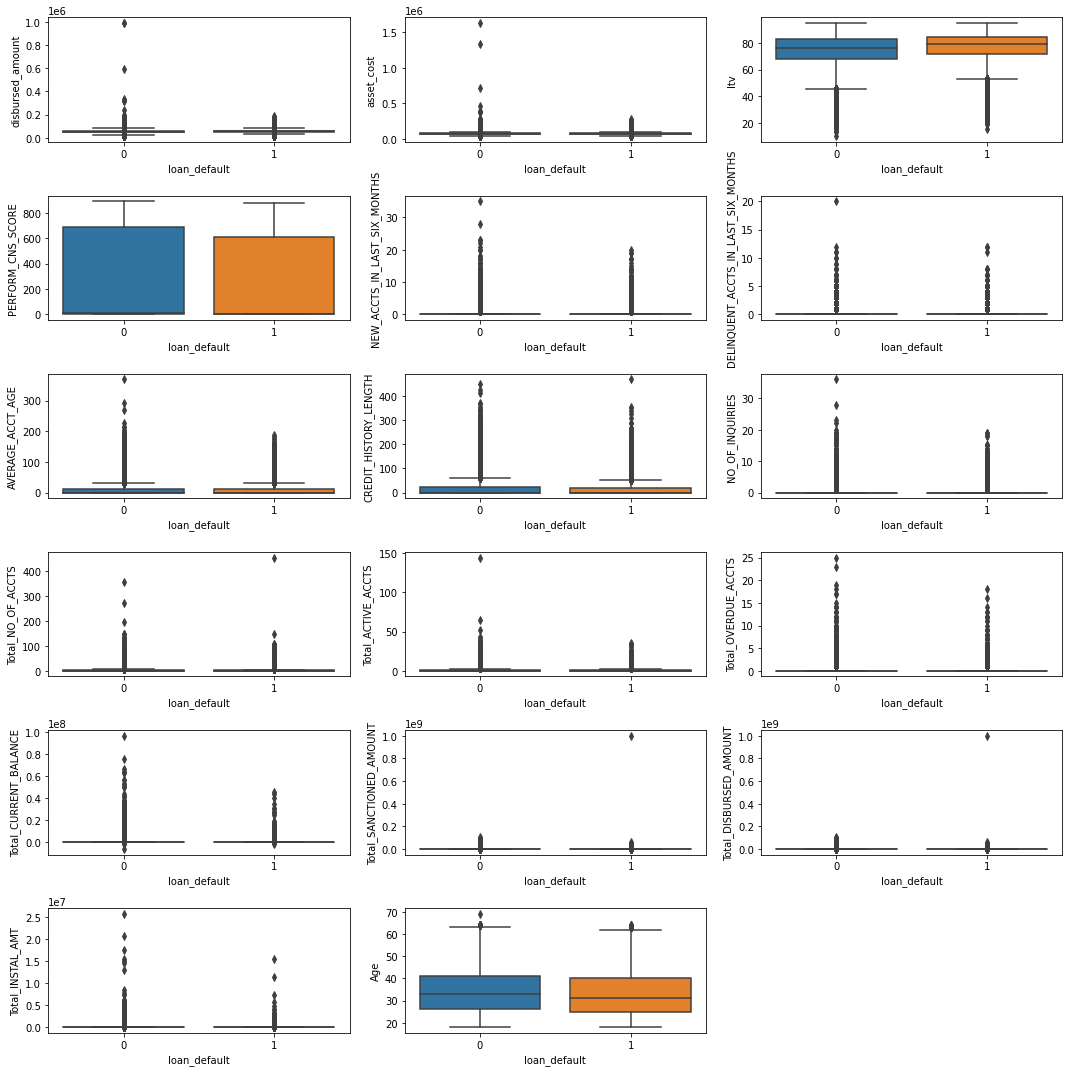

In [48]:
# For Numerical
plt.figure(figsize=[15,15])
c = 1
for i in nume:
    plt.subplot(6,3,c)
    sns.boxplot(y=df.loc[:,i] , x=df.loan_default)
    c = c+1
    
plt.tight_layout()
plt.show()

#### Inference
* For disbursed amount and for asset cost people are defaulting for lower values
* Loan to value ratio for defaulter is higher than non defaulters
* cns score of defaulter people is lover than that of the non defaulters
* There are outlier present in the data 

## Heatmap

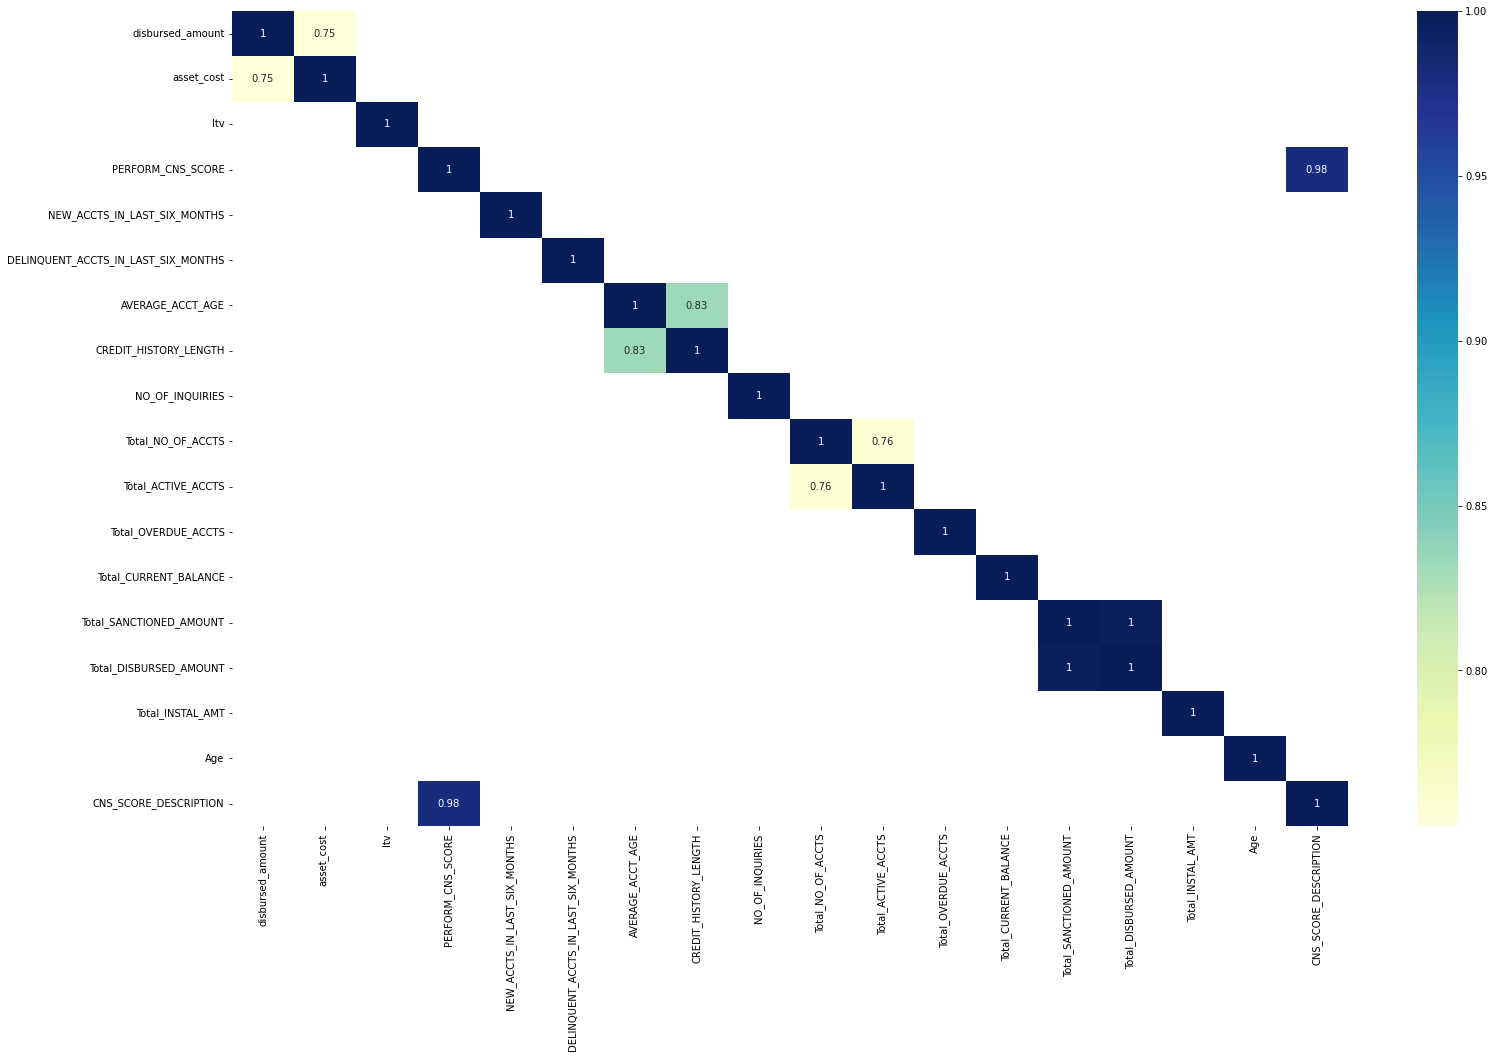

In [49]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr()[abs(df.corr()) >= 0.75],annot=True,cmap = 'YlGnBu')
plt.show()

**From the above correlation heatmap, we can see that some of the features are highly correlated(>0.75) with each other.**
#### Inference
- disbursed amount and asset cost - 0.75
- average_acct_age and credit_history_length - 0.83
- no_of_accts and active_accts - 0.76
- Total_sanctioned_amount and total_disbursed_amount - 1 
- Csn descripltion and csn score - 0.98
- we will will keep one of them


In [50]:
df.shape

(233154, 22)

In [51]:
# We only droping sanctioned_amount right now as it 100 % correlated
df.drop(['asset_cost', 'AVERAGE_ACCT_AGE', 'PERFORM_CNS_SCORE','Total_ACTIVE_ACCTS', 'Total_SANCTIONED_AMOUNT'], axis = 1, inplace=True)

In [52]:
df.shape

(233154, 17)

In [53]:
df['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

In [54]:
# Lets use frequency encoding for manufacturing id
freq = (df['manufacturer_id'].value_counts()/len(df)).to_dict()
df['manufacturer_id'] = df['manufacturer_id'].map(freq)
df['manufacturer_id'].value_counts()

0.469792    109534
0.242870     56626
0.116678     27204
0.071669     16710
0.043834     10220
0.041423      9658
0.010315      2405
0.003337       778
0.000051        12
0.000026         6
0.000004         1
Name: manufacturer_id, dtype: int64

In [55]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
nume = [i for i in df.columns if i not in cate and i != 'loan_default']
scaled = pd.DataFrame(rs.fit_transform(df[nume]), columns= nume)
scaled.head()

,disbursed_amount,ltv,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Total_NO_OF_ACCTS,Total_OVERDUE_ACCTS,Total_CURRENT_BALANCE,Total_DISBURSED_AMOUNT,Total_INSTAL_AMT,Age
0,-0.243066,0.862069,0.0,0.0,0.000000,0.0,-0.333333,0.0,0.000000,0.00000,0.000000,0.133333
1,-0.501809,-0.241379,0.0,1.0,0.958333,0.0,0.000000,1.0,0.739233,0.78091,0.955833,0.066667
2,-0.039569,0.867478,0.0,0.0,0.000000,0.0,-0.333333,0.0,0.000000,0.00000,0.000000,0.066667
3,0.279620,0.789723,0.0,0.0,0.625000,1.0,0.666667,0.0,0.000000,0.00000,0.014882,-0.466667
4,-0.107401,0.783638,0.0,0.0,0.000000,1.0,-0.333333,0.0,0.000000,0.00000,0.000000,0.600000


In [56]:
dummy = pd.get_dummies(data = df[cate], columns=['Employment_Type'], drop_first=True)
dummy.head()

,manufacturer_id,No_of_documents,CNS_SCORE_DESCRIPTION,Employment_Type_Self employed,Employment_Type_UnEmployeed
0,0.24287,1,0,0,0
1,0.24287,1,2,1,0
2,0.24287,1,0,1,0
3,0.24287,1,1,1,0
4,0.24287,1,0,1,0


In [57]:
df_full = pd.concat([scaled, dummy], axis = 1)
df_full.shape

(233154, 17)

In [58]:
df_full.head()

,disbursed_amount,ltv,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Total_NO_OF_ACCTS,Total_OVERDUE_ACCTS,Total_CURRENT_BALANCE,Total_DISBURSED_AMOUNT,Total_INSTAL_AMT,Age,manufacturer_id,No_of_documents,CNS_SCORE_DESCRIPTION,Employment_Type_Self employed,Employment_Type_UnEmployeed
0,-0.243066,0.862069,0.0,0.0,0.000000,0.0,-0.333333,0.0,0.000000,0.00000,0.000000,0.133333,0.24287,1,0,0,0
1,-0.501809,-0.241379,0.0,1.0,0.958333,0.0,0.000000,1.0,0.739233,0.78091,0.955833,0.066667,0.24287,1,2,1,0
2,-0.039569,0.867478,0.0,0.0,0.000000,0.0,-0.333333,0.0,0.000000,0.00000,0.000000,0.066667,0.24287,1,0,1,0
3,0.279620,0.789723,0.0,0.0,0.625000,1.0,0.666667,0.0,0.000000,0.00000,0.014882,-0.466667,0.24287,1,1,1,0
4,-0.107401,0.783638,0.0,0.0,0.000000,1.0,-0.333333,0.0,0.000000,0.00000,0.000000,0.600000,0.24287,1,0,1,0


In [59]:
df_full['No_of_documents'] = df_full['No_of_documents'].astype('int')
df['loan_default'] = df['loan_default'].astype('int')

In [60]:
# final Check of data
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  float64
 1   ltv                                  233154 non-null  float64
 2   NEW_ACCTS_IN_LAST_SIX_MONTHS         233154 non-null  float64
 3   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  233154 non-null  float64
 4   CREDIT_HISTORY_LENGTH                233154 non-null  float64
 5   NO_OF_INQUIRIES                      233154 non-null  float64
 6   Total_NO_OF_ACCTS                    233154 non-null  float64
 7   Total_OVERDUE_ACCTS                  233154 non-null  float64
 8   Total_CURRENT_BALANCE                233154 non-null  float64
 9   Total_DISBURSED_AMOUNT               233154 non-null  float64
 10  Total_INSTAL_AMT                     233154 non-null  float64
 11  Age          

## Train Test split


In [61]:
from sklearn.model_selection import train_test_split
X = df_full
y = df['loan_default']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((174865, 17), (58289, 17), (174865,), (58289,))

In [62]:
y_train.value_counts(normalize=True)

0    0.783273
1    0.216727
Name: loan_default, dtype: float64

In [63]:
y_test.value_counts(normalize=True)

0    0.781897
1    0.218103
Name: loan_default, dtype: float64

# BASE MODEL 

In [64]:
import statsmodels.api as sm

xc = sm.add_constant(x_train)
xt = sm.add_constant(x_test)

base_model = sm.Logit(y_train, xc).fit()

print(base_model.summary())

Optimization terminated successfully.
         Current function value: 0.507934
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               174865
Model:                          Logit   Df Residuals:                   174847
Method:                           MLE   Df Model:                           17
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                 0.02831
Time:                        09:20:49   Log-Likelihood:                -88820.
converged:                       True   LL-Null:                       -91408.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.0752      0.028 

In [65]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

In [99]:
train_prob = base_model.predict(xc)
train_pred = [0 if x < 0.5 else 1 for x in train_prob]
test_prob = base_model.predict(xt)
test_pred = [0 if x < 0.5 else 1 for x in test_prob]

train = classification_report(y_train,train_pred)
test = classification_report(y_test, test_pred)
print(train)
print(test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    136967
           1       0.41      0.00      0.01     37898

    accuracy                           0.78    174865
   macro avg       0.60      0.50      0.44    174865
weighted avg       0.70      0.78      0.69    174865

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     45576
           1       0.45      0.00      0.01     12713

    accuracy                           0.78     58289
   macro avg       0.62      0.50      0.44     58289
weighted avg       0.71      0.78      0.69     58289



In [100]:
# Insignificant variable as per base model
base_model.pvalues[base_model.pvalues > 0.05]

Total_DISBURSED_AMOUNT         0.146912
Total_INSTAL_AMT               0.489305
No_of_documents                0.898698
Employment_Type_UnEmployeed    0.802892
dtype: float64

In [101]:
# lets make result table where we will save all results of model
result = pd.DataFrame(columns = ['Model Name', 'Accuracy', 'Recall', 'ROC_AUC_Score'])
result

,Model Name,Accuracy,Recall,ROC_AUC_Score


In [102]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[0] = ['Base Model', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956


## Lets Balance the Target varibale

In [70]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=10)
x_bal, y_bal = smt.fit_resample(x_train, y_train)

In [71]:
y_bal.value_counts()

0    136967
1    136967
Name: loan_default, dtype: int64

# Linear Model
## LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [103]:
logreg = LogisticRegression()
logreg.fit(x_bal, y_bal)

train_pred = logreg.predict(x_bal)
test_pred = logreg.predict(x_test)
test_prob = logreg.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.60      0.55      0.57    136967
           1       0.58      0.63      0.60    136967

    accuracy                           0.59    273934
   macro avg       0.59      0.59      0.59    273934
weighted avg       0.59      0.59      0.59    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.84      0.55      0.67     45576
           1       0.28      0.62      0.39     12713

    accuracy                           0.57     58289
   macro avg       0.56      0.59      0.53     58289
weighted avg       0.72      0.57      0.60     58289



In [104]:
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[1] = ['LogisticRegression Model', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581


## SGDClassifier

In [109]:
# Hypertuning for Best Parameters by GridSearchCV
sgd = SGDClassifier()

param = {'loss':['log_loss', 'log'],
        'penalty': ['l2', 'l1', 'elasticnet']}
      
grd = GridSearchCV(estimator=sgd, param_grid=param, cv=5, scoring='recall')

grd.fit(x_bal, y_bal)

grd.best_params_

{'loss': 'log_loss', 'penalty': 'l2'}

In [114]:
sgd = SGDClassifier(alpha=0.01, loss='log_loss',penalty='l2')
sgd.fit(x_bal, y_bal)

train_pred = sgd.predict(x_bal)
test_pred = sgd.predict(x_test)
test_prob = sgd.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.60      0.53      0.56    136967
           1       0.58      0.64      0.61    136967

    accuracy                           0.59    273934
   macro avg       0.59      0.59      0.59    273934
weighted avg       0.59      0.59      0.59    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.84      0.54      0.65     45576
           1       0.28      0.63      0.38     12713

    accuracy                           0.56     58289
   macro avg       0.56      0.58      0.52     58289
weighted avg       0.72      0.56      0.60     58289



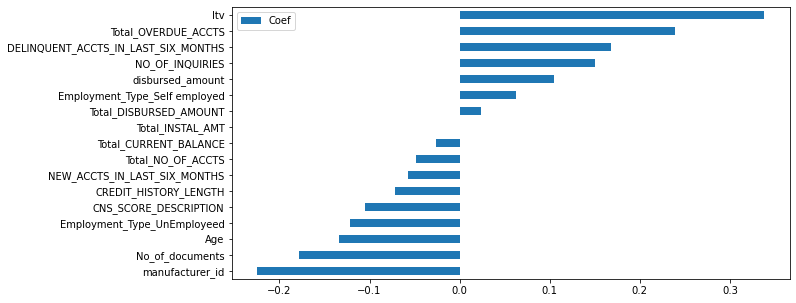

In [115]:
pd.DataFrame(sgd.coef_.reshape(17,1),columns = ['Coef'], index=x_bal.columns).sort_values('Coef').plot(kind = 'barh')
plt.show()

In [116]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[2] = ['SGDClassifier Model', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912


# Non Linear Model
## DecisionTreeClassifier

In [78]:
# Lets Import all non linear models
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [82]:
# Hypertuning for Best Parameters by GridSearchCV
dct = DecisionTreeClassifier()

param = {'criterion': ['entropy', 'gini'], 'max_depth': range(2, 5)}
      
grd = GridSearchCV(estimator=dct, param_grid=param, cv=10, scoring='recall')

grd.fit(x_bal, y_bal)

grd.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [117]:
# Lets Fit model with best parameter
dct = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dct.fit(x_bal, y_bal)

train_pred = dct.predict(x_bal)
test_pred = dct.predict(x_test)
test_prob = dct.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.62      0.56      0.58    136967
           1       0.60      0.66      0.62    136967

    accuracy                           0.61    273934
   macro avg       0.61      0.61      0.60    273934
weighted avg       0.61      0.61      0.60    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.83      0.55      0.66     45576
           1       0.27      0.58      0.36     12713

    accuracy                           0.56     58289
   macro avg       0.55      0.57      0.51     58289
weighted avg       0.70      0.56      0.60     58289



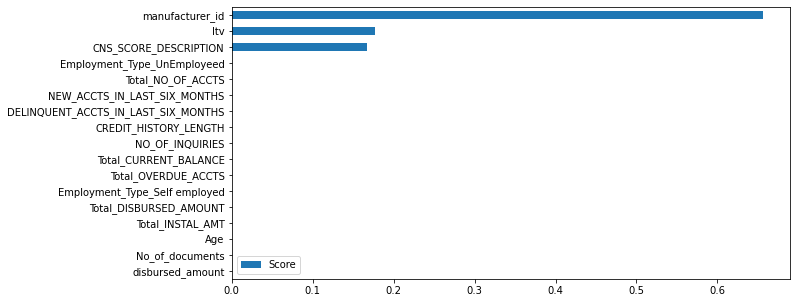

In [118]:
pd.DataFrame(dct.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score').plot(kind = 'barh')
plt.show()

In [119]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[3] = ['DecisionTreeClassifier', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912
3,DecisionTreeClassifier,0.558304,0.581295,0.582040


## Random Forest

In [89]:
# Hypertuning for Best Parameters by GridSearchCV
rf = RandomForestClassifier()

param = {'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10)}

grd = GridSearchCV(estimator=rf, param_grid=param, cv=5, scoring='recall')

grd.fit(x_bal, y_bal)

grd.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [120]:
# Lets Fit model with best parameter
rf = RandomForestClassifier(criterion='gini', max_depth = 5)
rf.fit(x_bal, y_bal)

train_pred = rf.predict(x_bal)
test_pred = rf.predict(x_test)
test_prob = rf.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.68      0.57      0.62    136967
           1       0.63      0.73      0.68    136967

    accuracy                           0.65    273934
   macro avg       0.66      0.65      0.65    273934
weighted avg       0.66      0.65      0.65    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.83      0.57      0.68     45576
           1       0.28      0.59      0.38     12713

    accuracy                           0.58     58289
   macro avg       0.56      0.58      0.53     58289
weighted avg       0.71      0.58      0.61     58289



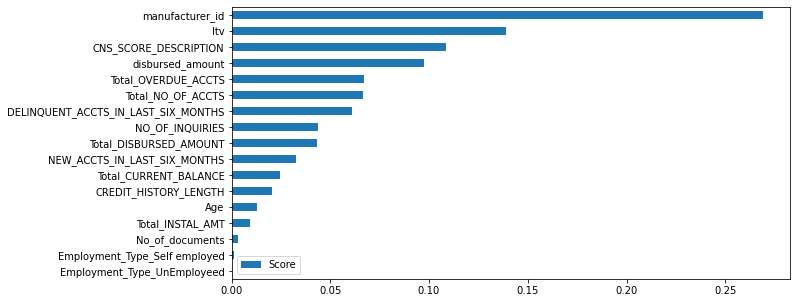

In [121]:
pd.DataFrame(rf.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score').plot(kind = 'barh')
plt.show()

In [122]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[4] = ['RandomForestClassifier', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912
3,DecisionTreeClassifier,0.558304,0.581295,0.582040
4,RandomForestClassifier,0.577553,0.593880,0.613064


## ExtraTreesClassifier

In [87]:
# Hypertuning for Best Parameters by GridSearchCV
etc = ExtraTreesClassifier()

param = {'criterion': ['entropy', 'gini'], 'max_depth': range(3, 10)}

grd = GridSearchCV(estimator=etc, param_grid=param, cv=5, scoring='recall')

grd.fit(x_bal, y_bal)

grd.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [123]:
# Lets Fit model with best parameter
etc = ExtraTreesClassifier(criterion='entropy', max_depth=9)
etc.fit(x_bal, y_bal)

train_pred = etc.predict(x_bal)
test_pred = etc.predict(x_test)
test_prob = etc.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.66      0.55      0.60    136967
           1       0.62      0.72      0.67    136967

    accuracy                           0.64    273934
   macro avg       0.64      0.64      0.63    273934
weighted avg       0.64      0.64      0.63    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.83      0.55      0.66     45576
           1       0.27      0.61      0.38     12713

    accuracy                           0.56     58289
   macro avg       0.55      0.58      0.52     58289
weighted avg       0.71      0.56      0.60     58289



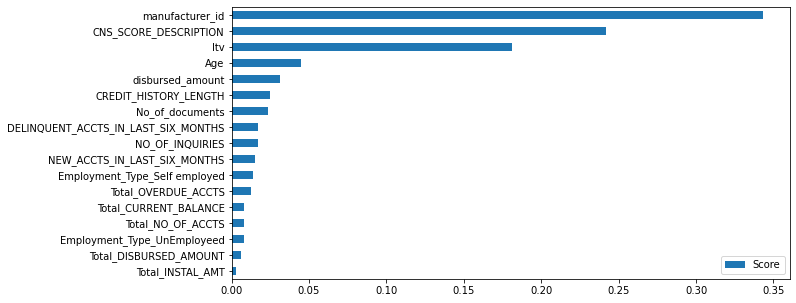

In [125]:
pd.DataFrame(etc.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score').plot(kind = 'barh')
plt.show()

In [126]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[5] = ['ExtraTreesClassifier', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912
3,DecisionTreeClassifier,0.558304,0.581295,0.582040
4,RandomForestClassifier,0.577553,0.593880,0.613064
5,ExtraTreesClassifier,0.561650,0.611343,0.607693


## AdaBoost

In [91]:
ada = AdaBoostClassifier()

param = {'learning_rate':[0.1,0.2,0.3,0.4]}

grd = GridSearchCV(estimator=ada, param_grid=param, cv=5, scoring='recall')

grd.fit(x_bal, y_bal)

grd.best_params_

{'learning_rate': 0.2}

In [127]:
# Lets Fit model with best parameter
ada = AdaBoostClassifier(learning_rate=0.2)
ada.fit(x_bal, y_bal)

train_pred = ada.predict(x_bal)
test_pred = ada.predict(x_test)
test_prob = ada.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.65      0.58      0.61    136967
           1       0.62      0.69      0.66    136967

    accuracy                           0.64    273934
   macro avg       0.64      0.64      0.63    273934
weighted avg       0.64      0.64      0.63    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.83      0.58      0.68     45576
           1       0.28      0.58      0.38     12713

    accuracy                           0.58     58289
   macro avg       0.55      0.58      0.53     58289
weighted avg       0.71      0.58      0.61     58289



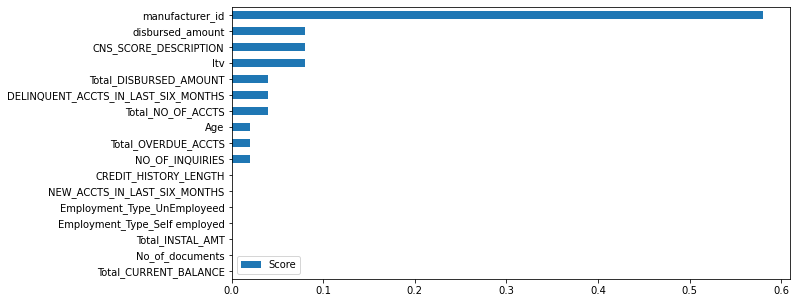

In [128]:
pd.DataFrame(ada.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score').plot(kind = 'barh')
plt.show()

In [129]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[6] = ['AdaBoostClassifier', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912
3,DecisionTreeClassifier,0.558304,0.581295,0.582040
4,RandomForestClassifier,0.577553,0.593880,0.613064
5,ExtraTreesClassifier,0.561650,0.611343,0.607693
6,AdaBoostClassifier,0.577159,0.582081,0.606665


## Gradient Boost

In [93]:
# Hypertuning for Best Parameters by GridSearchCV
gbc = GradientBoostingClassifier()

param = {'learning_rate':[0.1, 0.2, 0.3]}

grd = GridSearchCV(estimator=gbc, param_grid=param, cv=5, scoring='recall')

grd.fit(x_bal, y_bal)
 
grd.best_params_

{'learning_rate': 0.1}

In [130]:
# Lets Fit model with best parameter
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_bal, y_bal)

train_pred = gbc.predict(x_bal)
test_pred = gbc.predict(x_test)
test_prob = gbc.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.72      0.80      0.76    136967
           1       0.78      0.68      0.73    136967

    accuracy                           0.74    273934
   macro avg       0.75      0.74      0.74    273934
weighted avg       0.75      0.74      0.74    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     45576
           1       0.29      0.30      0.30     12713

    accuracy                           0.69     58289
   macro avg       0.55      0.55      0.55     58289
weighted avg       0.69      0.69      0.69     58289



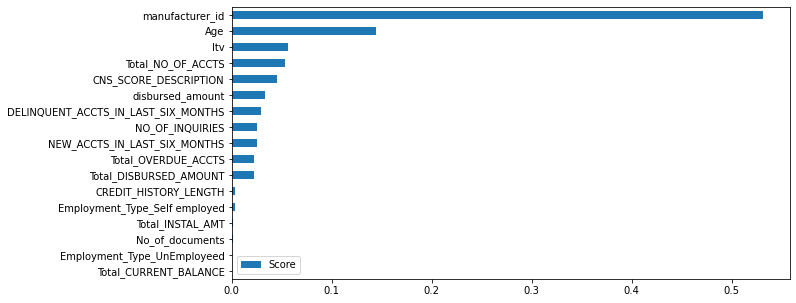

In [131]:
pd.DataFrame(gbc.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score').plot(kind = 'barh')
plt.show()

In [132]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[7] = ['GradientBoostingClassifier', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912
3,DecisionTreeClassifier,0.558304,0.581295,0.582040
4,RandomForestClassifier,0.577553,0.593880,0.613064
5,ExtraTreesClassifier,0.561650,0.611343,0.607693
6,AdaBoostClassifier,0.577159,0.582081,0.606665
7,GradientBoostingClassifier,0.690919,0.298749,0.608521


## XG Boost

In [95]:
# Hypertuning for Best Parameters by GridSearchCV
xg = XGBClassifier(learning_rate = 0.3)

param = {'gamma': [0, 1, 2, 3, 4]}

grd = GridSearchCV(estimator=xg, param_grid=param, cv=5, scoring='recall')

grd.fit(x_bal, y_bal)

grd.best_params_

{'gamma': 2}

In [133]:
# Lets Fit model with best parameter
xg = XGBClassifier(gamma = 2)
xg.fit(x_bal, y_bal)

train_pred = xg.predict(x_bal)
test_pred = xg.predict(x_test)
test_prob = xg.predict_proba(x_test)[:,1]

train = classification_report(y_bal,train_pred)
test = classification_report(y_test, test_pred)

print('Train classification_report')
print(train)
print('Test classification_report')
print(test)

Train classification_report
              precision    recall  f1-score   support

           0       0.75      0.96      0.84    136967
           1       0.95      0.68      0.79    136967

    accuracy                           0.82    273934
   macro avg       0.85      0.82      0.82    273934
weighted avg       0.85      0.82      0.82    273934

Test classification_report
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     45576
           1       0.33      0.08      0.13     12713

    accuracy                           0.77     58289
   macro avg       0.56      0.52      0.49     58289
weighted avg       0.69      0.77      0.70     58289



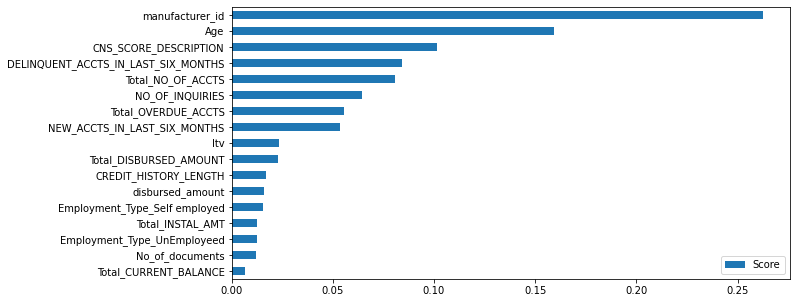

In [134]:
pd.DataFrame(xg.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score').plot(kind = 'barh')
plt.show()

In [135]:
# Storing results in table
a = accuracy_score(y_test, test_pred)
r = recall_score(y_test, test_pred)
roc = roc_auc_score(y_test, test_prob)
result.loc[8] = ['XGBClassifier', a, r ,roc]
result

,Model Name,Accuracy,Recall,ROC_AUC_Score
0,Base Model,0.781726,0.003776,0.621956
1,LogisticRegression Model,0.566368,0.622512,0.618581
2,SGDClassifier Model,0.557000,0.633839,0.614912
3,DecisionTreeClassifier,0.558304,0.581295,0.582040
4,RandomForestClassifier,0.577553,0.593880,0.613064
5,ExtraTreesClassifier,0.561650,0.611343,0.607693
6,AdaBoostClassifier,0.577159,0.582081,0.606665
7,GradientBoostingClassifier,0.690919,0.298749,0.608521
8,XGBClassifier,0.765307,0.077086,0.617438


# Best Model

In [164]:
# Sorting as per Recall
result.sort_values('Recall', ascending=False)

,Model Name,Accuracy,Recall,ROC_AUC_Score
2,SGDClassifier Model,0.557000,0.633839,0.614912
1,LogisticRegression Model,0.566368,0.622512,0.618581
5,ExtraTreesClassifier,0.561650,0.611343,0.607693
4,RandomForestClassifier,0.577553,0.593880,0.613064
6,AdaBoostClassifier,0.577159,0.582081,0.606665
3,DecisionTreeClassifier,0.558304,0.581295,0.582040
7,GradientBoostingClassifier,0.690919,0.298749,0.608521
8,XGBClassifier,0.765307,0.077086,0.617438
0,Base Model,0.781726,0.003776,0.621956


In [ ]:
# We can see that SGDClassifier Mode has the highest recall so
# we are considring it has best model

# So Our best Model is 
## SGDClassifier

## Confusion Matrix

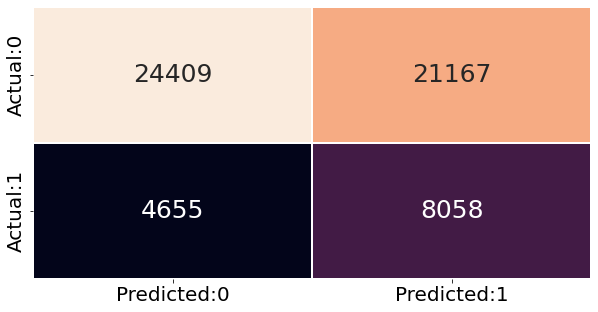

In [156]:
test_pred = sgd.predict(x_test)

cm = confusion_matrix(y_test, test_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## Roc_curve

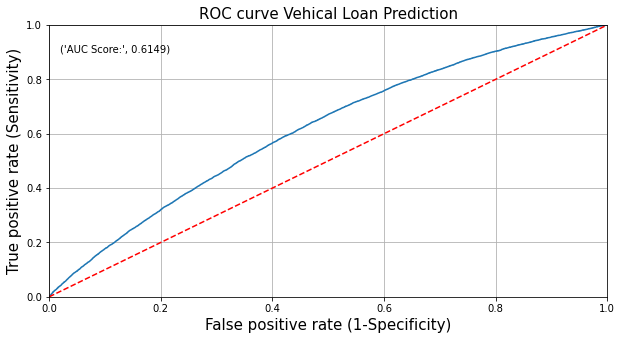

In [197]:
test_prob = sgd.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve Vehical Loan Prediction', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, test_prob),4)))

plt.grid(True)

In [199]:
pd.DataFrame(xg.feature_importances_,columns = ['Score'], index=x_bal.columns).sort_values('Score', ascending = False)

,Score
manufacturer_id,0.262492
Age,0.159263
CNS_SCORE_DESCRIPTION,0.101453
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,0.084208
Total_NO_OF_ACCTS,0.080531
NO_OF_INQUIRIES,0.064184
Total_OVERDUE_ACCTS,0.055304
NEW_ACCTS_IN_LAST_SIX_MONTHS,0.053733
ltv,0.023449
Total_DISBURSED_AMOUNT,0.022801
